to gather fd_stats from qc reports

In [1]:
import json
import csv 
import os
from glob import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = '/data'

#change for different thresholds 

FD_MEAN_THRESH = .2 
FC_PERC_THRESH = 30

In [4]:
qc_reports = list(glob(os.path.join(DATA_DIR, 'derivatives', 'mriqc', 'derivatives', '*_bold.json')))
qc_reports = sorted(qc_reports)

In [7]:
fd_dict = defaultdict(dict, {})

for file in qc_reports:
    file_name = os.path.basename(file)
    f2 = file_name.split('_')
    sub_num = f2[0]
    task = f2[2].split('-')[1] #shifted from f2[1] because of session ID
    with open(file) as f:
        temp_data = json.load(f)
        temp_mean = temp_data.get('fd_mean')
        temp_num = temp_data.get('fd_num')
        temp_perc = temp_data.get('fd_perc')
        #print(sub_num)
        fd_dict[sub_num][task] = {'fd_mean': temp_mean, 'fd_num': temp_num, 'fd_perc': temp_perc}     

In [8]:
# solution: https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionary/13581730
fd_stats = pd.DataFrame.from_dict({(i,j): fd_dict[i][j] 
                           for i in fd_dict.keys()
                           for j in fd_dict[i].keys()},
                       orient='index' )

pd.MultiIndex.from_frame(fd_stats)

fd_stats

fd_mean  fd_num    fd_perc
sub-s061 CCTHot        0.137224     135  15.715949
         WATT3         0.151611     137  17.430025
         stopSignal    0.125783      44   8.396947
         twoByTwo      0.124104      73   7.087379
         DPX           0.108978      58   5.301645
...                         ...     ...        ...
sub-s650 rest          0.253770     332  47.025496
         stroop        0.231252      51  15.044248
         surveyMedley  0.189059     209  34.775374
         CCTHot        0.200641     432  40.563380
         stopSignal    0.149828      96  18.640777

[1117 rows x 3 columns]

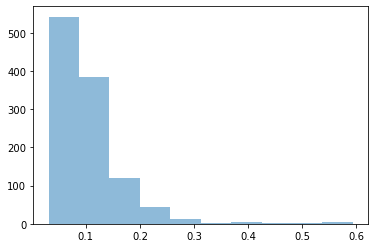

In [9]:
plt.hist(fd_stats['fd_mean'].values, alpha=0.5)
plt.show()

In [10]:



fd_problem = (fd_stats.fd_mean > FD_MEAN_THRESH) | ( fd_stats.fd_perc > FC_PERC_THRESH)
#print(fd_prob)

# pd.set_option("display.max_rows", -1)
np.mean(fd_stats.fd_mean)

#for sub in sublist:
#    fd_stats['fd_mean'][sub]
    

0.10574073430368408

In [11]:
#write to tsv 

fd_stats.to_csv('../aim1_fd_stats.tsv',sep='\t')

In [12]:
fd_stats

fd_mean  fd_num    fd_perc
sub-s061 CCTHot        0.137224     135  15.715949
         WATT3         0.151611     137  17.430025
         stopSignal    0.125783      44   8.396947
         twoByTwo      0.124104      73   7.087379
         DPX           0.108978      58   5.301645
...                         ...     ...        ...
sub-s650 rest          0.253770     332  47.025496
         stroop        0.231252      51  15.044248
         surveyMedley  0.189059     209  34.775374
         CCTHot        0.200641     432  40.563380
         stopSignal    0.149828      96  18.640777

[1117 rows x 3 columns]

In [15]:
bad_df = fd_stats[fd_problem]

In [24]:
bad_df.index.unique(0)

Index(['sub-s234', 'sub-s471', 'sub-s499', 'sub-s512', 'sub-s567', 'sub-s568',
       'sub-s573', 'sub-s581', 'sub-s582', 'sub-s586', 'sub-s588', 'sub-s598',
       'sub-s602', 'sub-s603', 'sub-s605', 'sub-s613', 'sub-s615', 'sub-s623',
       'sub-s624', 'sub-s627', 'sub-s629', 'sub-s631', 'sub-s633', 'sub-s635',
       'sub-s636', 'sub-s638', 'sub-s639', 'sub-s644', 'sub-s649', 'sub-s650'],
      dtype='object')